In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import random
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import seaborn as sns

from sklearn.model_selection import train_test_split
from imodels import RuleFitRegressor,GreedyTreeRegressor,HSTreeRegressorCV, SLIMRegressor

In [2]:
dtypes = [
    ("MONP composition", "category"), ("Plant subclass", "category"), ("Size (nm)", "float32"),
    ("Surface charge (mV)", "float32"), ("Concentration (mg/kg)", "float32"), ("SOM (%)", "float32"),
    ("Clay (%)", "float32"), ("Exposure time (days)", "float32"), ("RCF", "float32"),
]
data = pd.read_excel("dataset_RCF.xlsx",
    names=[d[0] for d in dtypes],
    dtype=dict(dtypes)
)
data

,MONP composition,Plant subclass,Size (nm),Surface charge (mV),Concentration (mg/kg),SOM (%),Clay (%),Exposure time (days),RCF
0,ZnO,Asteridae,68.000000,-10.0,900.0,1.13,39.0,35.0,0.227778
1,ZnO,Asteridae,68.000000,-10.0,900.0,1.13,39.0,35.0,0.288889
2,ZnO,Asteridae,68.000000,-10.0,450.0,1.13,39.0,35.0,0.355556
3,ZnO,Asteridae,68.000000,-10.0,450.0,1.13,39.0,35.0,0.555556
4,ZnO,Asteridae,68.000000,-10.0,225.0,1.13,39.0,35.0,0.666667
...,...,...,...,...,...,...,...,...,...
125,CuO,Rosidae,50.000000,-52.0,50.0,1.59,26.0,120.0,0.210000
126,CuO,Rosidae,25.000000,-52.0,50.0,1.59,26.0,120.0,0.250000
127,CeO2,Rosidae,16.299999,13.8,100.0,1.10,13.0,84.0,0.120000
128,CeO2,Rosidae,16.299999,13.8,200.0,1.10,13.0,84.0,0.130000


In [3]:
X = data.drop(['RCF'], axis=1)
Y = data['RCF']
X.head(5)

,MONP composition,Plant subclass,Size (nm),Surface charge (mV),Concentration (mg/kg),SOM (%),Clay (%),Exposure time (days)
0,ZnO,Asteridae,68.0,-10.0,900.0,1.13,39.0,35.0
1,ZnO,Asteridae,68.0,-10.0,900.0,1.13,39.0,35.0
2,ZnO,Asteridae,68.0,-10.0,450.0,1.13,39.0,35.0
3,ZnO,Asteridae,68.0,-10.0,450.0,1.13,39.0,35.0
4,ZnO,Asteridae,68.0,-10.0,225.0,1.13,39.0,35.0


In [4]:
Y_log = np.log10(Y)
Y = Y_log
Y_log

0     -0.642489
1     -0.539269
2     -0.449093
3     -0.255272
4     -0.176091
         ...   
125   -0.677781
126   -0.602060
127   -0.920819
128   -0.886057
129   -0.795880
Name: RCF, Length: 130, dtype: float32

In [5]:
X_onehot = pd.get_dummies(X)
X_onehot.head(5)

,Size (nm),Surface charge (mV),Concentration (mg/kg),SOM (%),Clay (%),Exposure time (days),MONP composition_CeO2,MONP composition_CuO,MONP composition_ZnO,Plant subclass_Asteridae,Plant subclass_Caryophyllidae,Plant subclass_Commelinidae,Plant subclass_Dilleniidae,Plant subclass_Rosidae
0,68.0,-10.0,900.0,1.13,39.0,35.0,0,0,1,1,0,0,0,0
1,68.0,-10.0,900.0,1.13,39.0,35.0,0,0,1,1,0,0,0,0
2,68.0,-10.0,450.0,1.13,39.0,35.0,0,0,1,1,0,0,0,0
3,68.0,-10.0,450.0,1.13,39.0,35.0,0,0,1,1,0,0,0,0
4,68.0,-10.0,225.0,1.13,39.0,35.0,0,0,1,1,0,0,0,0


In [6]:
# run LightGBM models first to get train/test index
# same train/test set with LightGBM
X_cv_index = np.load('X_cv_index.npy')
X_test_index = np.load('X_test_index.npy')

In [7]:
X_cv = X_onehot.loc[X_cv_index]
X_test = X_onehot.loc[X_test_index]
Y_cv = Y.loc[X_cv_index]
Y_test = Y.loc[X_test_index]
X_cv.to_excel('./train.xlsx')
X_test.to_excel('./test.xlsx')
X_cv.head(5)

,Size (nm),Surface charge (mV),Concentration (mg/kg),SOM (%),Clay (%),Exposure time (days),MONP composition_CeO2,MONP composition_CuO,MONP composition_ZnO,Plant subclass_Asteridae,Plant subclass_Caryophyllidae,Plant subclass_Commelinidae,Plant subclass_Dilleniidae,Plant subclass_Rosidae
91,68.0,-10.00,20.0,1.69,18.0,35.0,0,0,1,0,0,0,1,0
107,68.0,-10.00,225.0,1.13,39.0,35.0,0,0,1,0,0,0,0,1
31,43.0,-10.50,500.0,4.15,31.9,60.0,0,1,0,0,0,1,0,0
102,8.0,2.19,250.0,4.20,5.0,52.0,1,0,0,0,0,0,0,1
40,43.0,-10.50,100.0,4.15,31.9,7.0,0,1,0,0,0,1,0,0


In [8]:
feature_names = X_cv.columns
feature_names

Index(['Size (nm)', 'Surface charge (mV)', 'Concentration (mg/kg)', 'SOM (%)',
       'Clay (%)', 'Exposure time (days)', 'MONP composition_CeO2',
       'MONP composition_CuO', 'MONP composition_ZnO',
       'Plant subclass_Asteridae', 'Plant subclass_Caryophyllidae',
       'Plant subclass_Commelinidae', 'Plant subclass_Dilleniidae',
       'Plant subclass_Rosidae'],
      dtype='object')

In [9]:
rulefit = RuleFitRegressor(n_estimators=1000, tree_size=4, sample_fract='default', max_rules=60, 
                           memory_par=0.01, tree_generator=RandomForestRegressor(), lin_trim_quantile=0.025, 
                           lin_standardise=True, exp_rand_tree_size=True, include_linear=True, 
                           alpha=None, cv=True, random_state=1)
rulefit.fit(X_cv, Y_cv, feature_names=feature_names)
Y_pred = rulefit.predict(X_test)
Y_cv_pred = rulefit.predict(X_cv)
print('R2_test: %.2f ' %r2_score(Y_test, Y_pred)) 
print('RMSE_test: %.2f ' %sqrt(mean_squared_error(Y_test, Y_pred))) 
print('R2_train: %.2f ' %r2_score(Y_cv, Y_cv_pred)) 
print('RMSE_train: %.2f ' %sqrt(mean_squared_error(Y_cv, Y_cv_pred))) 

R2_test: 0.81 
RMSE_test: 0.26 
R2_train: 0.94 
RMSE_train: 0.15 


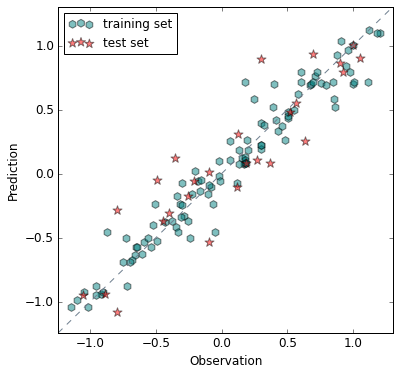

In [10]:
figure = plt.figure(figsize=(6,6))
plt.style.use('classic')
plt.xlim(min(Y)-0.1, max(Y)+0.1)
plt.ylim(min(Y)-0.1, max(Y)+0.1)
plt.plot([min(Y)-0.1,max(Y)+0.1],[min(Y)-0.1,max(Y)+0.1],color="slategrey",linestyle='--')

plt.scatter(Y_cv, Y_cv_pred,marker="h", c='teal', s=60, alpha=0.5,label="training set")   
plt.scatter(Y_test, Y_pred,marker="*",c='red', s=90, alpha=0.5,label="test set")

plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.legend(loc=0,fontsize=12)
plt.plot()
figure.savefig("./RCF_LabelEncoder/RuleFit_Predcitons_observations_label.jpg",dpi=600,bbox_inches='tight')

In [11]:
rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("importance", ascending=False)
rules.to_excel("rules.xlsx")
rules

,rule,type,coef,support,importance
69,SOM (%) <= 4.025 and SOM (%) > 1.64,rule,0.256127,0.288462,0.116038
24,Plant subclass_Commelinidae <= 0.5 and Concent...,rule,-0.243578,0.269231,0.108041
54,Surface charge (mV) > -43.2 and Concentration ...,rule,0.224952,0.653846,0.107019
68,Surface charge (mV) <= -7.705 and Concentratio...,rule,0.243159,0.259615,0.106606
27,Concentration (mg/kg) > 37.5 and Exposure time...,rule,-0.170262,0.307692,0.078582
63,Surface charge (mV) > -10.25 and Concentration...,rule,0.214617,0.144231,0.075400
22,Plant subclass_Rosidae > 0.5,rule,-0.144143,0.240385,0.061595
31,Surface charge (mV) <= -0.015 and Surface char...,rule,-0.160438,0.125000,0.053060
45,Concentration (mg/kg) > 37.5 and SOM (%) > 2.2...,rule,-0.106686,0.269231,0.047322
50,Size (nm) <= 64.0 and Surface charge (mV) > -4...,rule,-0.096727,0.317308,0.045019


In [12]:
def find_mk(input_vars:list, rule:str):

    var_count = 0
    for var in input_vars:
        if var in rule:
            var_count += 1
    return(var_count)

def get_feature_importance(feature_set: list, rule_set: pd.DataFrame, scaled = False):

    feature_imp = list()
    
    rule_feature_count = rule_set.rule.apply(lambda x: find_mk(feature_set, x))

    for feature in feature_set:
        
        # find subset of rules that apply to a feature
        feature_rk = rule_set.rule.apply(lambda x: feature in x)
        
        # find importance of linear features
        linear_imp = rule_set[(rule_set.type=='linear')&(rule_set.rule==feature)].importance.values
        
        # find the importance of rules that contain feature
        rule_imp = rule_set.importance[(rule_set.type=='rule')&feature_rk]
        
        # find the number of features in each rule that contain feature
        m_k = rule_feature_count[(rule_set.type=='rule')&feature_rk]
        
        # sum the linear and rule importances, divided by m_k
        if len(linear_imp)==0:
            linear_imp = 0
        # sum the linear and rule importances, divided by m_k
        if len(rule_imp) == 0:
            feature_imp.append(float(linear_imp))
        else:
            feature_imp.append(float(linear_imp + (rule_imp/m_k).sum()))
        
    if scaled:
        feature_imp = 100*(feature_imp/np.array(feature_imp).max())
    
    return(feature_imp)

In [13]:
feature_importances = get_feature_importance(X_onehot.columns, rules, scaled=False)
importance_df = pd.DataFrame(feature_importances, index = X_onehot.columns, columns = ['importance']).sort_values(by='importance',ascending=False)
importance_df

,importance
Concentration (mg/kg),0.398790
SOM (%),0.208184
Surface charge (mV),0.170478
Exposure time (days),0.160933
Plant subclass_Rosidae,0.131221
Clay (%),0.107859
MONP composition_ZnO,0.106685
MONP composition_CeO2,0.100506
Plant subclass_Commelinidae,0.048124
Plant subclass_Dilleniidae,0.047589


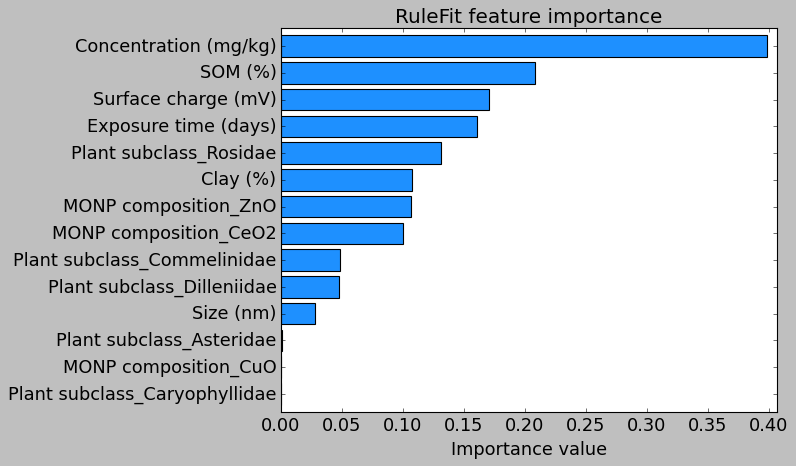

In [14]:
figure = plt.figure(figsize=(8,6))
plt.style.use('classic')
plt.rcParams['font.size'] ='16'
plt.margins(0.02)

plt.barh(importance_df.index[::-1], importance_df.importance[::-1],
          align='center', color="#1E90FF")

plt.title('RuleFit feature importance',fontsize=18)
plt.xlabel('Importance value',fontsize=16)
figure.savefig("./RCF_LabelEncoder/RuleFit_importance.jpg",dpi=600,bbox_inches='tight')

In [15]:
importance_df_sum = importance_df.copy()
importance_df_sum

,importance
Concentration (mg/kg),0.398790
SOM (%),0.208184
Surface charge (mV),0.170478
Exposure time (days),0.160933
Plant subclass_Rosidae,0.131221
Clay (%),0.107859
MONP composition_ZnO,0.106685
MONP composition_CeO2,0.100506
Plant subclass_Commelinidae,0.048124
Plant subclass_Dilleniidae,0.047589


In [16]:
plant_subclass_importance = importance_df_sum.loc['Plant subclass_Rosidae',:]+importance_df_sum.loc['Plant subclass_Commelinidae',:]+importance_df_sum.loc['Plant subclass_Dilleniidae',:]+importance_df_sum.loc['Plant subclass_Asteridae',:]+importance_df_sum.loc['Plant subclass_Caryophyllidae',:]
MONP_composition_importance = importance_df_sum.loc['MONP composition_ZnO',:]+importance_df_sum.loc['MONP composition_CeO2',:]+importance_df_sum.loc['MONP composition_CuO',:]

In [17]:
importance_df_sum.loc['Plant subclass'] = plant_subclass_importance
importance_df_sum.loc['MONP composition'] = MONP_composition_importance

importance_df_sum=importance_df_sum.drop(labels=['Plant subclass_Rosidae','Plant subclass_Commelinidae','Plant subclass_Dilleniidae','Plant subclass_Asteridae',
                              'Plant subclass_Caryophyllidae','MONP composition_ZnO','MONP composition_CeO2','MONP composition_CuO'],axis=0)

importance_df_sum

,importance
Concentration (mg/kg),0.398790
SOM (%),0.208184
Surface charge (mV),0.170478
Exposure time (days),0.160933
Clay (%),0.107859
Size (nm),0.028216
Plant subclass,0.227613
MONP composition,0.207192


In [18]:
importance_df_sum.sort_values("importance",inplace=True,ascending=False)
importance_df_sum

,importance
Concentration (mg/kg),0.398790
Plant subclass,0.227613
SOM (%),0.208184
MONP composition,0.207192
Surface charge (mV),0.170478
Exposure time (days),0.160933
Clay (%),0.107859
Size (nm),0.028216


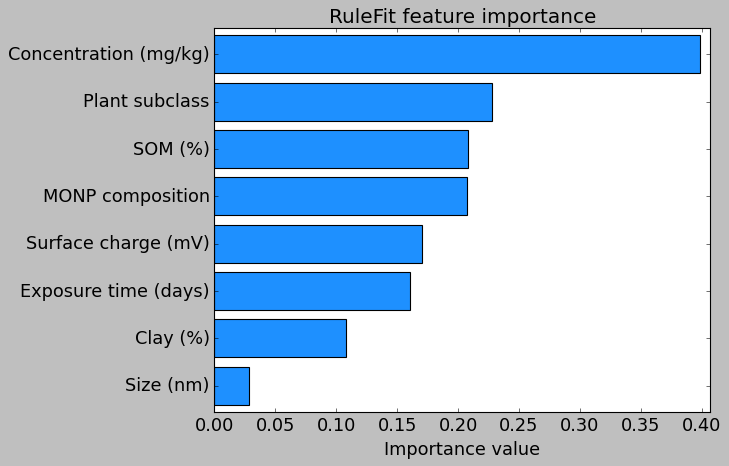

In [19]:
figure = plt.figure(figsize=(8,6))
plt.style.use('classic')
plt.rcParams['font.size'] ='16'
plt.margins(0.02)

plt.barh(importance_df_sum.index[::-1], importance_df_sum.importance[::-1],
          align='center', color="#1E90FF")

plt.title('RuleFit feature importance',fontsize=18)
plt.xlabel('Importance value',fontsize=16)
figure.savefig("./RCF_LabelEncoder/RuleFit_importance_sum.jpg",dpi=600,bbox_inches='tight')